<a href="https://colab.research.google.com/github/Varshinigarlapati963/EL_DS_05/blob/main/EL_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I recently explored the Titanic dataset and practiced data cleaning, feature extraction, and visualization using Pandas, Seaborn, and Matplotlib. Here's a breakdown of what I did:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

→ Load the Titanic training data using Pandas.

In [3]:
print(df.head(5))
print("\nmissing values before cleaning:")
print( df.isnull().sum())
print("duplicated rows before cleaning:")
print(df.duplicated().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

m

-> checking the missing and duplicated values.

In [4]:
print("filling missing values:")
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print("missing values after cleaning:")
print(df.isnull().sum())
print("duplicated rows after cleaning:")
print(df.duplicated().sum())

filling missing values:
missing values after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
duplicated rows after cleaning:
0


-> filling the missing values and checking again.

cleaning steps:

-> Filled missing Age values with the median age.

-> Filled missing Embarked values with the most frequent port (mode).



In [5]:
df['Deck'] = df['Cabin'].str[0]
df['Deck'].fillna('Unknown', inplace=True)
df.drop('Cabin', axis=1, inplace=True)

df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
df['FamilySize'] = df['SibSp'] + df['Parch']


<ipython-input-5-8f863acaa385>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Deck'].fillna('Unknown', inplace=True)


In [6]:
print(df.describe())
print(df.info())
print(df.value_counts())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  FamilySize  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.904602  
std      0.806057   49.693429    1.613459  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    0.000000  
50%      0.000000   14.454200    0.000000  
75%      0.000000   31.000000    1.000000  
max      6.000000



->Extracted Deck letter from the Cabin column and replaced missing with 'Unknown'.

->Extracted Title (like Mr, Miss, etc.) from the Name using regex.

->Created a new feature: FamilySize = SibSp + Parch (people the passenger traveled with).




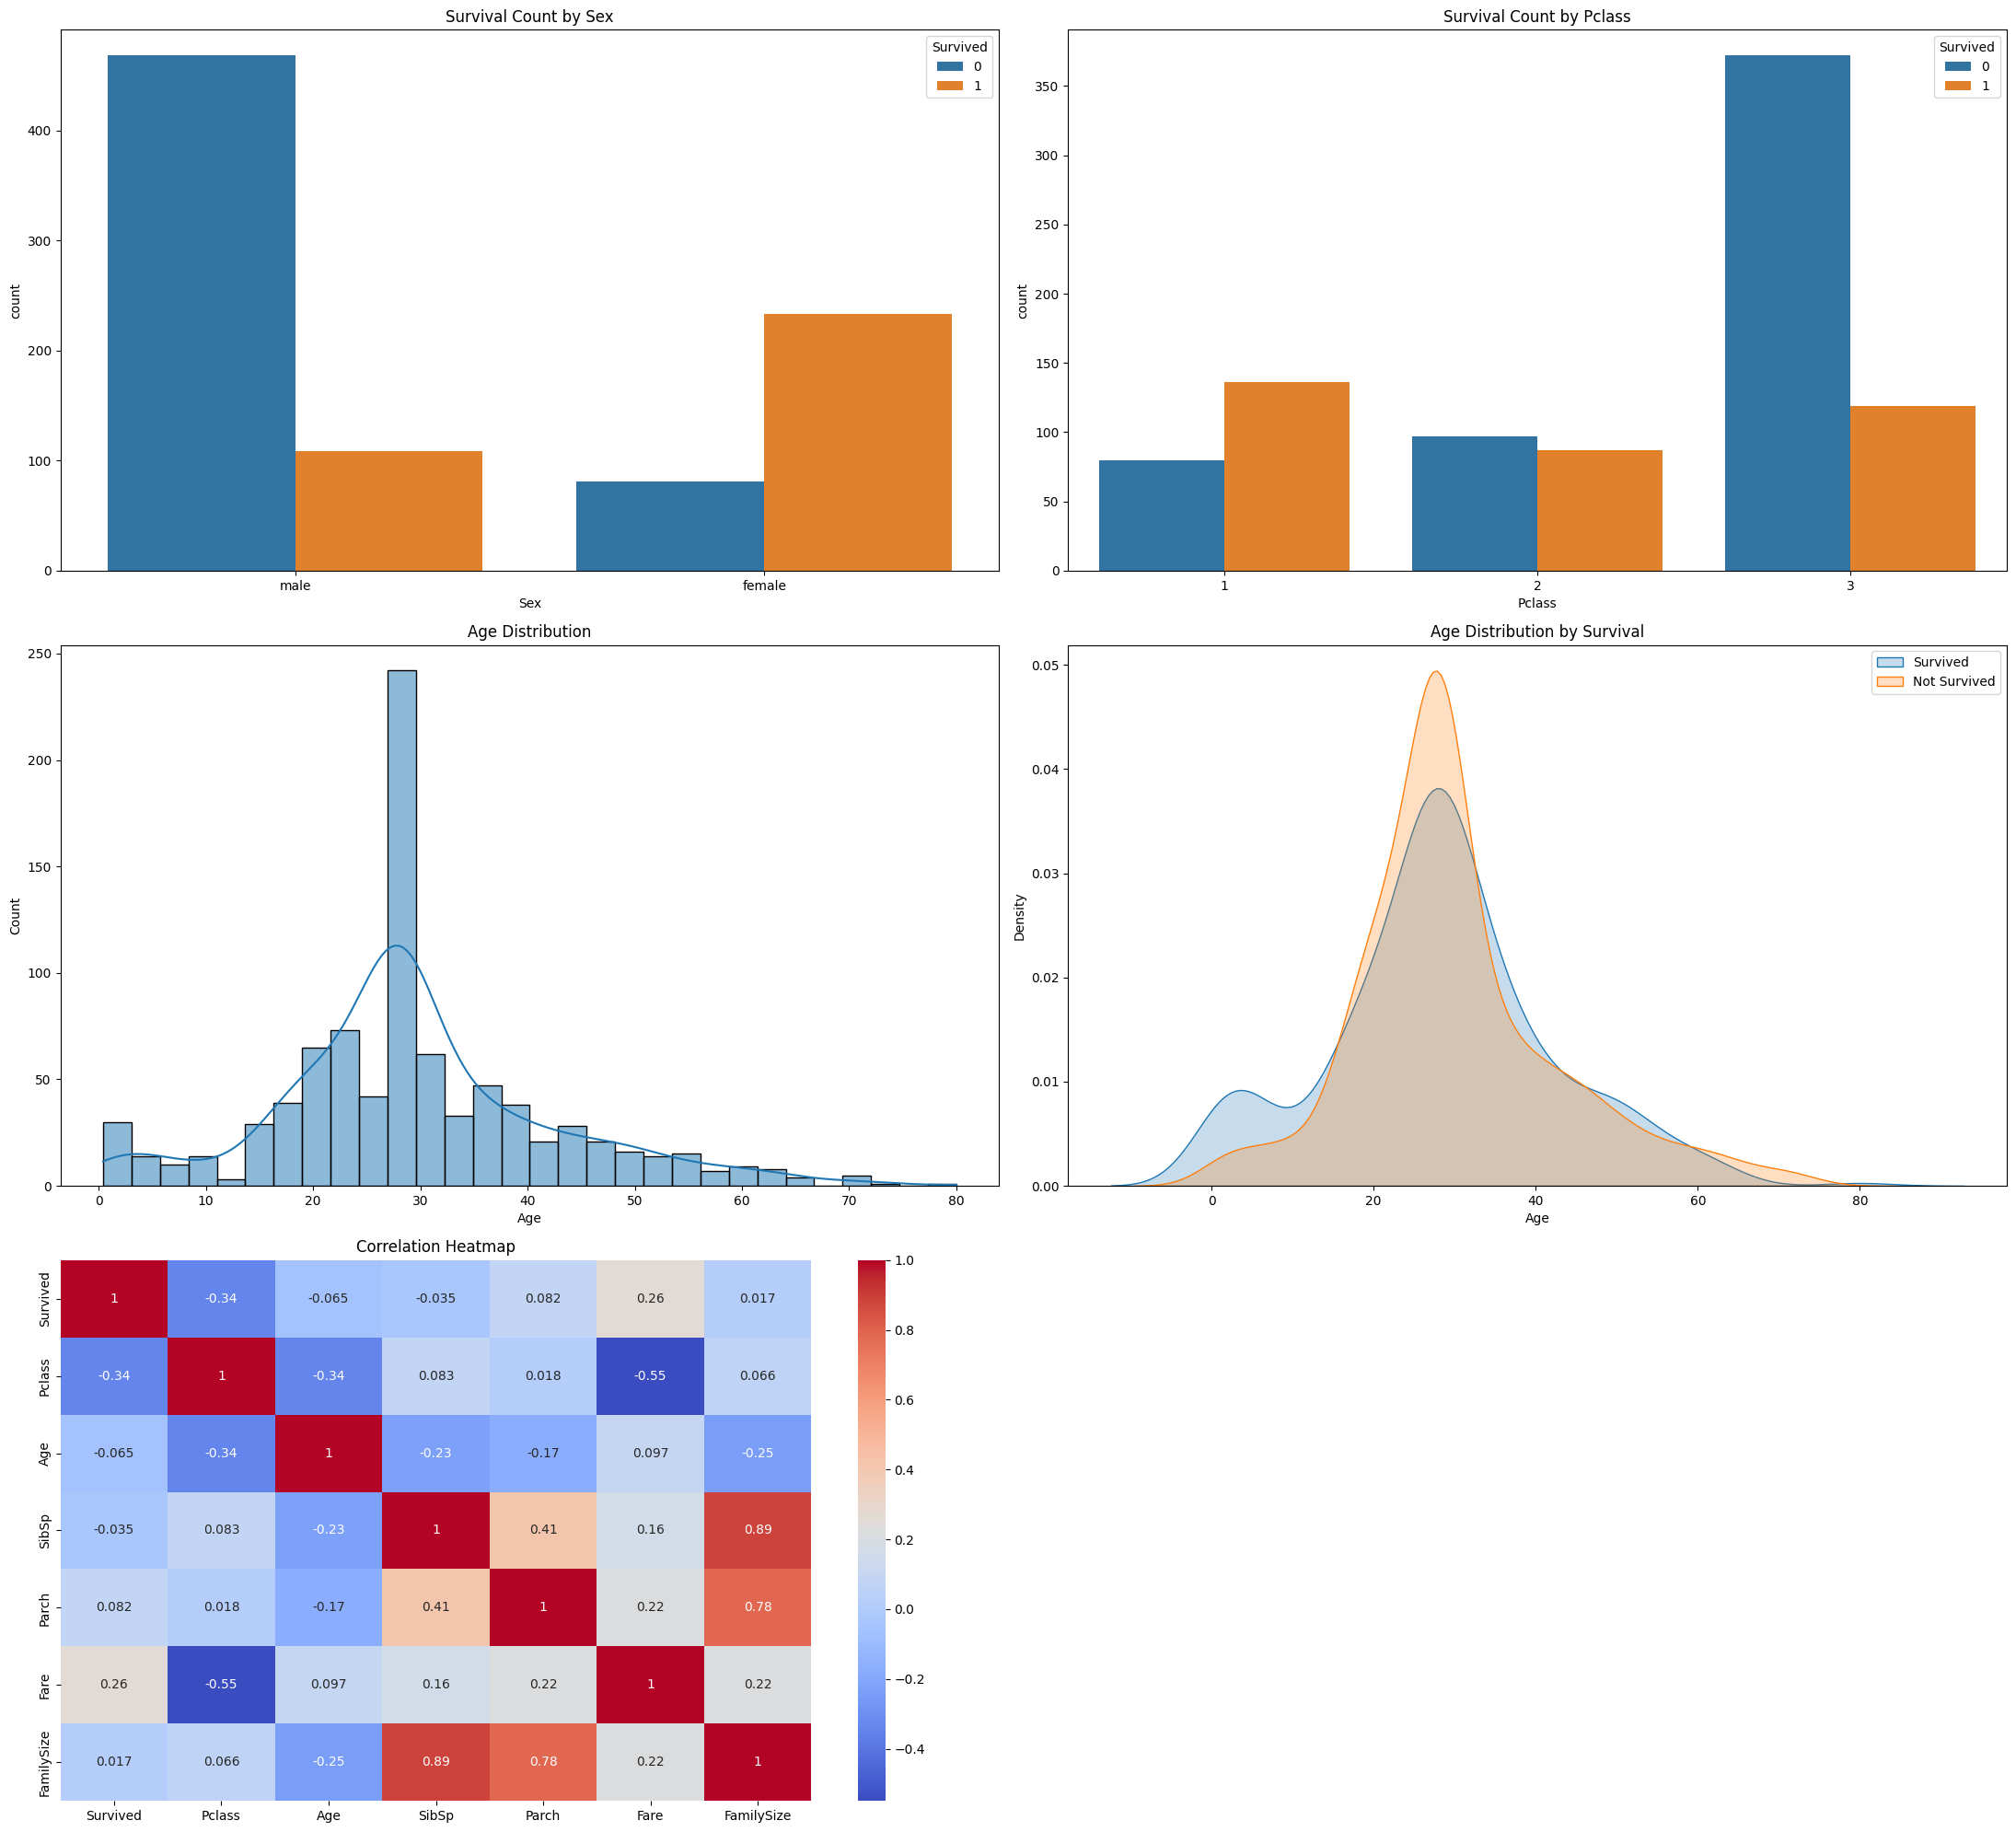

In [9]:
#Count plot: Survival by Sex
plt.figure(figsize=(22, 20))
plt.subplot(3,2,1)
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
# Count plot: Survival by Pclass
plt.subplot(3,2,2)
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Pclass')
# Histogram: Age distribution
plt.subplot(3,2,3)
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')

#kdeplot:age distribution by survival
plt.subplot(3,2,4)
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', fill=True)
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Not Survived', fill=True)
plt.title('Age Distribution by Survival')
plt.legend()

numeric_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
corr = df[numeric_features].corr()
plt.subplot(3,2,5)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Pairplot of Numeric Features')

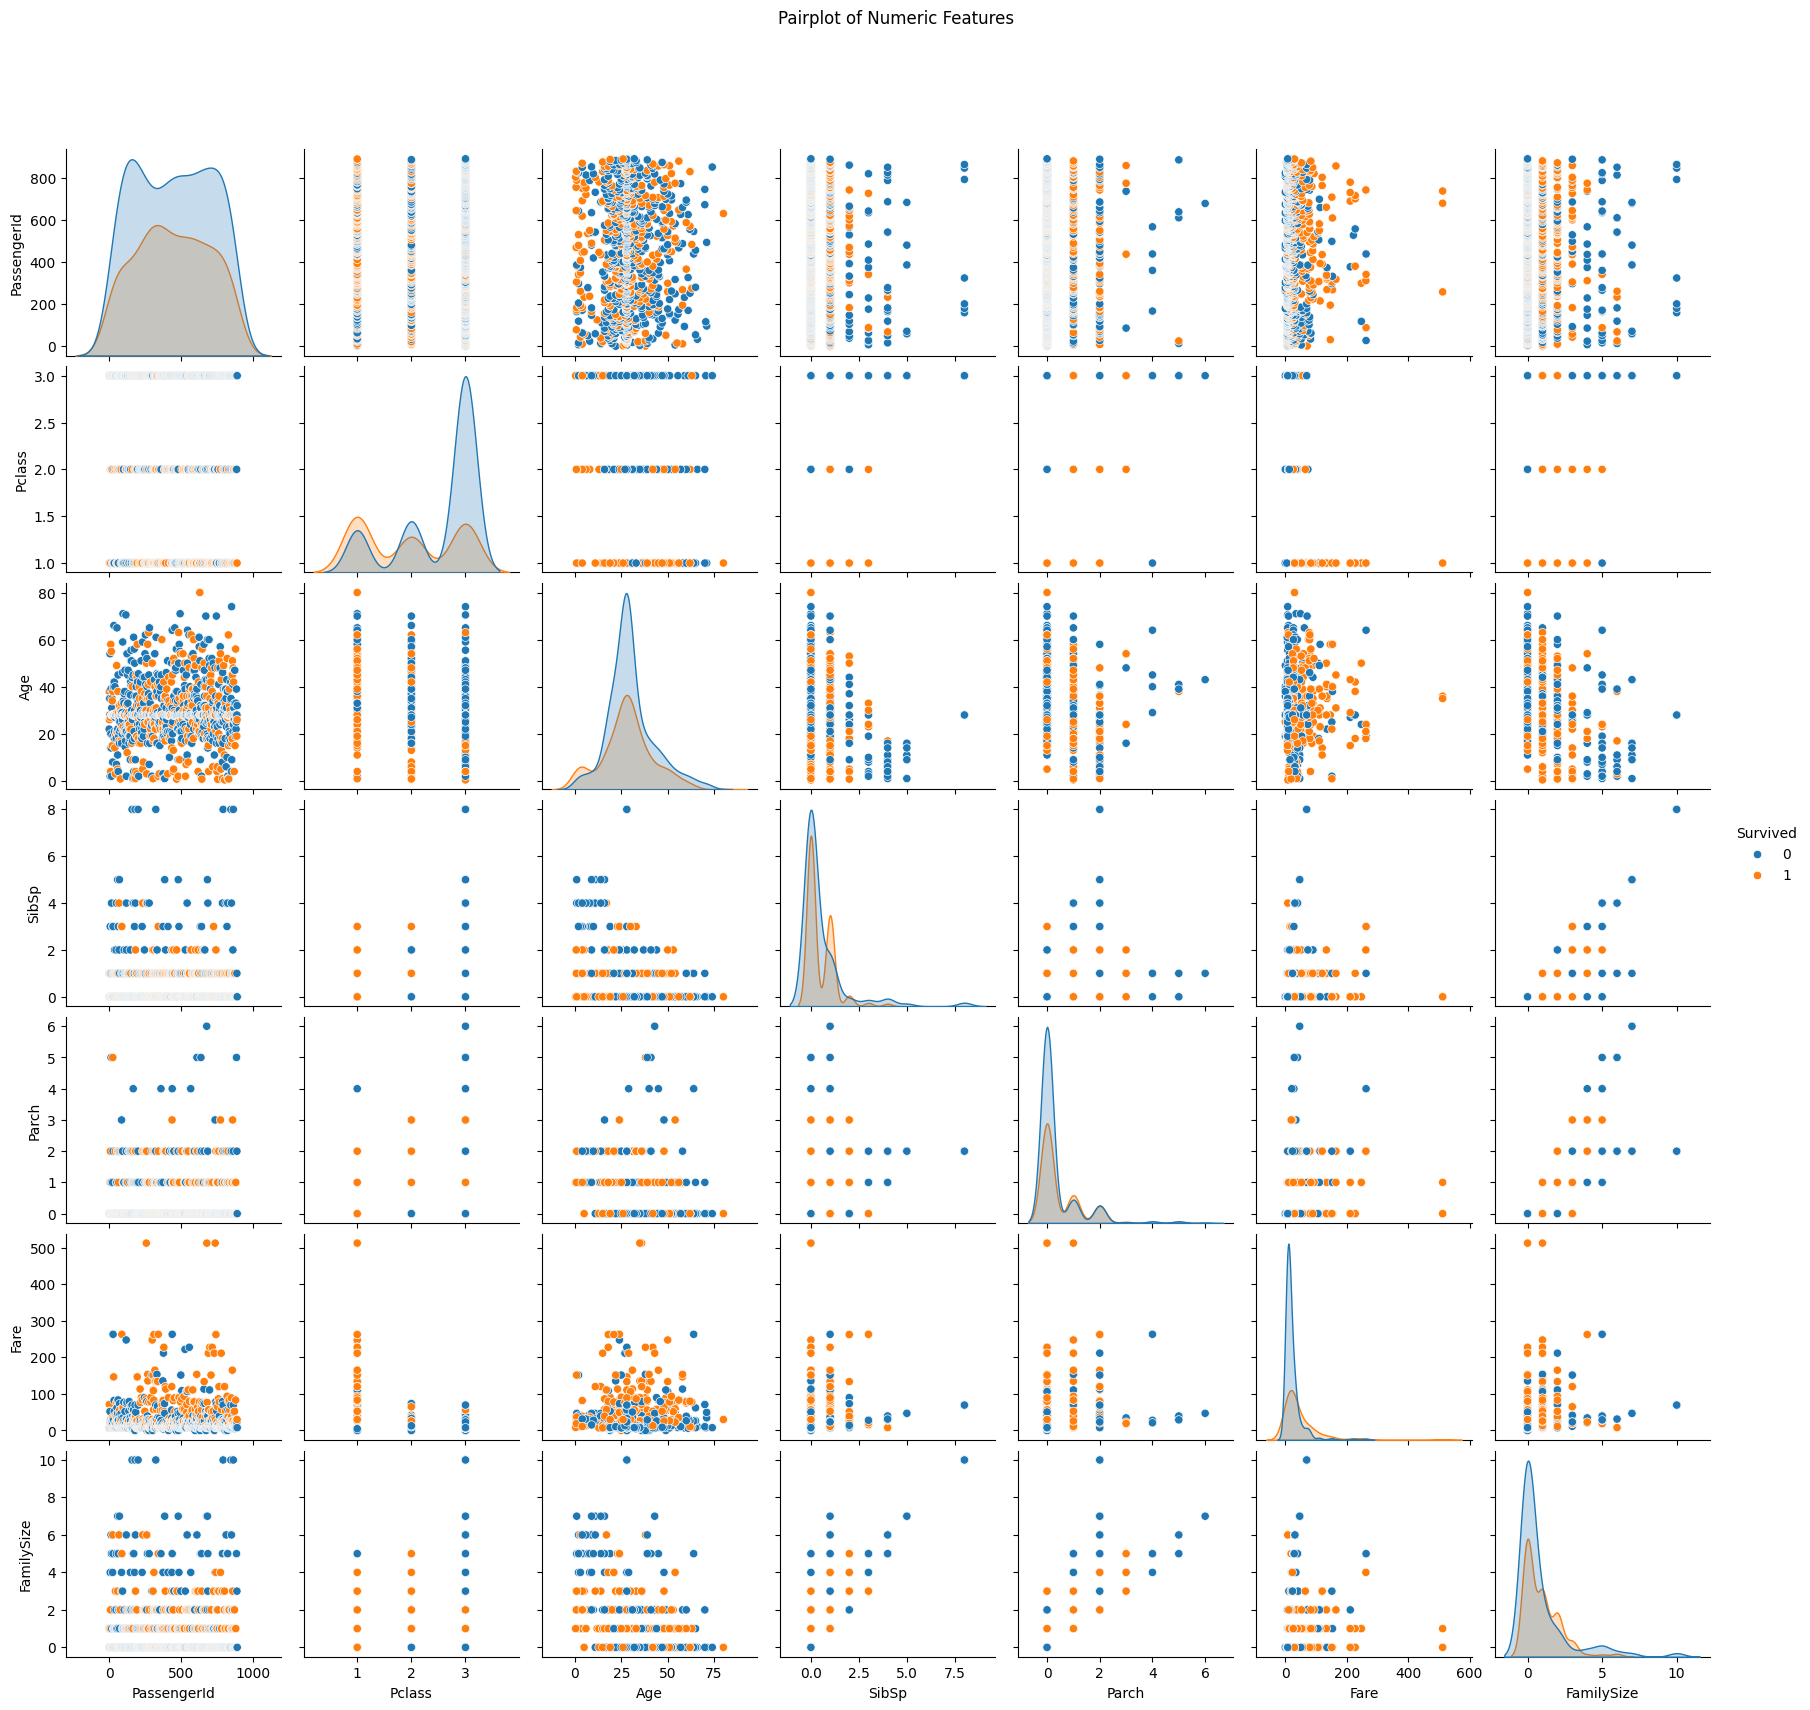

In [12]:
numeric_features = df.select_dtypes(include=['number']).columns.tolist()

sns.pairplot(df[numeric_features], hue='Survived')
plt.subplots_adjust(top=0.9)
plt.suptitle('Pairplot of Numeric Features')


 Visualizations and What They Mean
 1. Count Plot (using Seaborn)
   A count plot shows the number of observations for each category in a feature.

   sns.countplot(x='Sex', hue='Survived')
   
🔎 Insight: More women survived than men. This aligns with "women and children first."

   sns.countplot(x='Pclass', hue='Survived')
   
🔎 Insight: First-class passengers had the highest survival rate, while third class had the lowest.

 2. KDE Plot (Kernel Density Estimate)
   A KDE plot shows a smoothed curve of the distribution of a variable (like Age). It's useful for spotting the overall shape and skewness.

   sns.histplot(x='Age', kde=True)

🔎 Insight: The Age distribution is right-skewed, meaning most passengers were young, with fewer older individuals.

  sns.kdeplot(df[df['Survived'] == 1]['Age']) vs df[df['Survived'] == 0]['Age']

🔎 Insight:Survivors were mostly younger people
Non-survivors were spread across all ages, especially older groups
This gives a strong hint that youth improved survival odds.

 3. Correlation Heatmap
   A heatmap visualizes correlations between numerical variables.
   Values close to 1 or -1 mean strong positive/negative correlation.

  sns.heatmap(df[numeric_cols].corr(), annot=True)

🔎 Insights:
Pclass is negatively correlated with Survival (higher class → more survival)

Fare is positively correlated with Survival

FamilySize has a weak correlation, but still worth exploring

4.A pair plot (via sns.pairplot):
It is a quick way to visualize the relationships and distributions of multiple numeric variables at once. Here’s what it gives you:

Scatterplots for every pair
On the off-diagonal, you get a grid of scatterplots showing how each feature relates to every other feature. This helps you spot correlations, clusters, or outliers.

Univariate distributions on the diagonal
By default you see either histograms or kernel‐density estimates of each variable along the diagonal—so you can check its distribution (e.g. skew, multimodality).

Hue grouping
If you pass a hue argument (like 'Survived'), the points and distributions are colored by that categorical variable. That way you can immediately see, for example, how survivors vs. non-survivors differ across features.

Summary of pairwise structure
Instead of manually plotting every scatter and histogram, one call to pairplot gives you the full matrix at once—making exploratory data analysis much faster.
